### Load ground truth

In [1]:
folder = "../../KOI_Data/"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_sets = pd.read_csv(folder+"/koi_sets_unb.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values

def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)

df_meta = pd.read_csv(folder+"/koi_metadata.csv")
df_meta = impute_on_pandas(df_meta)

df_meta_train = df_meta[mask_train]
df_meta_test = df_meta[mask_test]
df_meta_unb = df_meta[mask_unlabeled]

y_train = ((df_meta_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_meta_test["NExScI Disposition"]=="CONFIRMED")*1).values

N_train = y_train.shape[0]
N_test = y_test.shape[0]
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [2]:
#is unsupervised.. i can use unlabeled!!

In [2]:
D_dim = 16

In [ ]:
#cuales son las columnas a utilizar??

In [3]:
#columns of interest
columns_to_get = [...]
D_dim = len(columns_to_get)

Y_meta_train = df_meta_train[columns_to_get].values
Y_meta_test = df_meta_test[columns_to_get].values

Y_meta_train #delete noise values??

array([[5.09246539e+00, 3.65900000e+00, 5.03700000e+03],
       [2.75073650e+02, 3.37000000e+00, 5.60400000e+03],
       [8.46043893e+00, 4.73492000e+00, 5.95100000e+03],
       ...,
       [1.99636721e+01, 2.64030000e+00, 5.25000000e+03],
       [7.65880048e+00, 3.04270000e+00, 5.65700000e+03],
       [2.05749981e+00, 2.56900000e+00, 4.62000000e+03]])

### Simmulate data (light curves)

In [4]:
import numpy as np

T = 70000

X_lc_train = np.random.rand(N_train,T)-1
X_lc_test = np.random.rand(N_test,T)-1
X_lc_train.shape

KeyboardInterrupt: 

In [5]:
!cat ../../../Processed_Data/README.md

* The "full" files are the light curve fill in with zeros.


In [6]:
import numpy as np

X_lc = np.load("../../../Processed_Data/koi_light_curves_full.npy")

X_lc_train = X_lc[mask_train]
X_lc_test = X_lc[mask_test]
X_lc_unb = X_lc[mask_unlabeled]

T = X_lc.shape[1]
X_lc_train

array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  2.045300e-01,
         9.262300e-01,  1.494430e+00],
       [-2.025964e+01, -1.010389e+01, -5.558290e+00, ..., -1.911220e+00,
        -5.594620e+00, -3.865780e+00],
       [ 9.410800e-01, -3.616800e-01, -1.116530e+00, ..., -4.587200e-01,
        -8.297240e+00, -1.625450e+00],
       ...,
       [-1.688180e+00,  1.293590e+00,  1.455800e-01, ..., -1.440000e-02,
         6.045700e-01,  9.496500e-01],
       [ 1.148920e+00,  8.045600e-01, -1.615840e+00, ..., -1.345200e+00,
         6.751000e-02, -8.428200e-01],
       [-7.190900e-01,  1.065930e+00, -7.208100e-01, ..., -2.630300e-01,
         2.627200e-01, -1.587410e+00]], dtype=float32)

In [3]:
!ls ../../../Datos_npy/

koi_light_curves_error.npy  koi_light_curves.npy
koi_light_curves_model.npy  koi_light_curves_time.npy


In [16]:
import numpy as np

X_lc = np.load("../../../Datos_npy/koi_light_curves.npy")
X_lc_time = np.load("../../../Datos_npy/koi_light_curves_time.npy")
X_lc_error = np.load("../../../Datos_npy/koi_light_curves_error.npy")

#fill empty with zero??-- o despues mejor..

X_lc_train = X_lc[mask_train]
X_lc_test = X_lc[mask_test]
X_lc_unb = X_lc[mask_unlabeled]

T = X_lc.shape[1]
X_lc_train

array([[          nan,           nan,           nan, ...,  2.045300e-01,
         9.262300e-01,  1.494430e+00],
       [-2.025964e+01, -1.010389e+01, -5.558290e+00, ..., -1.911220e+00,
        -5.594620e+00, -3.865780e+00],
       [ 9.410800e-01, -3.616800e-01, -1.116530e+00, ..., -4.587200e-01,
        -8.297240e+00, -1.625450e+00],
       ...,
       [-1.688180e+00,  1.293590e+00,  1.455800e-01, ..., -1.440000e-02,
         6.045700e-01,  9.496500e-01],
       [ 1.148920e+00,  8.045600e-01, -1.615840e+00, ..., -1.345200e+00,
         6.751000e-02, -8.428200e-01],
       [-7.190900e-01,  1.065930e+00, -7.208100e-01, ..., -2.630300e-01,
         2.627200e-01, -1.587410e+00]], dtype=float32)

In [7]:
T

71427

### pre-processing light curves
---

In [19]:
lc_cleaner = CleanLC()

X_lc_train = lc_cleaner.process(X_lc_train)
X_lc_test = lc_cleaner.process(X_lc_test)
X_lc_train

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:907: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.1102001e-01,  9.3272001e-01,  1.5009199e+00],
       [-2.0252871e+01, -1.0097120e+01, -5.5515199e+00, ...,
        -1.9044499e+00, -5.5878501e+00, -3.8590102e+00],
       [ 5.9036499e-01, -7.1239495e-01, -1.4672449e+00, ...,
        -8.0943501e-01, -8.6479549e+00, -1.9761651e+00],
       ...,
       [-1.6805450e+00,  1.3012249e+00,  1.5321499e-01, ...,
        -6.7649996e-03,  6.1220497e-01,  9.5728499e-01],
       [ 1.1477901e+00,  8.0343002e-01, -1.6169699e+00, ...,
        -1.3463299e+00,  6.6380002e-02, -8.4394997e-01],
       [-7.1134001e-01,  1.0736800e+00, -7.1306002e-01, ...,
        -2.5527999e-01,  2.7046999e-01, -1.5796599e+00]], dtype=float32)

In [21]:
from scipy.stats import iqr
class OwnProcessor(object):
    """ Scale values (already center LC)"""
    def __init__(self,median = True, setmin=True):
        self.median = median
        self.setmin = setmin
        
    def fit(self,lc):
        #if self.median:
        #    medians = np.median(lc,axis=1)
        #    self.center = np.mean(medians) #or medians of medians?
        #else:
        #    means = np.mean(lc,axis=1)
        #    self.center = np.mean(means)
       # self.center = 0 #ya fue rellenado con cero (debe ser eso)-- cambiar a rellenar despues..
        
        #mediana podria ser mejor..
        if self.setmin: #min -1
            mins = np.abs(np.min(lc,axis=1))
            if self.median:
                self.min = np.median(mins)
            else:
                self.min = np.mean(mins) #o media??
        else:
            print("Not Recomended")
            #standar scaler
            #robust
            iqrs = iqr(lc, axis=1)
            #stds = np.std(lc, axis=1)
            if self.median:
                self.min = np.median(iqrs)
            else:
                self.min = np.mean(iqrs)
    
    def transform(self,lc):
        return lc/self.min
    
    def inverse_transform(self,lc):
        return lc*self.min

ownpro = OwnProcessor(median=False, setmin=True) #or false fasle
ownpro.fit(X_lc_train)

X_train = ownpro.transform(X_lc_train)
X_test = ownpro.transform(X_lc_test)
X_train

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.4876804e-03,  1.0995684e-02,  1.7694101e-02],
       [-2.3875779e-01, -1.1903330e-01, -6.5445960e-02, ...,
        -2.2451250e-02, -6.5874249e-02, -4.5493241e-02],
       [ 6.9597163e-03, -8.3983075e-03, -1.7297110e-02, ...,
        -9.5422976e-03, -1.0194933e-01, -2.3296688e-02],
       ...,
       [-1.9811669e-02,  1.5339929e-02,  1.8062266e-03, ...,
        -7.9751473e-05,  7.2171846e-03,  1.1285276e-02],
       [ 1.3531109e-02,  9.4715049e-03, -1.9062195e-02, ...,
        -1.5871665e-02,  7.8254298e-04, -9.9491887e-03],
       [-8.3858715e-03,  1.2657438e-02, -8.4061483e-03, ...,
        -3.0094541e-03,  3.1885265e-03, -1.8622354e-02]], dtype=float32)

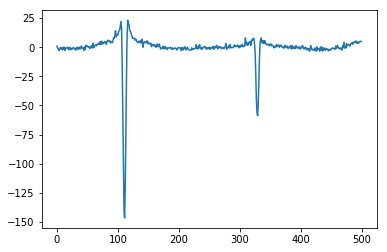

In [36]:
plt.plot(X_lc_train[2][:500])

In [23]:
ownpro.min # as mean

84.82601

In [61]:
ownpro.min # as median

8.803925

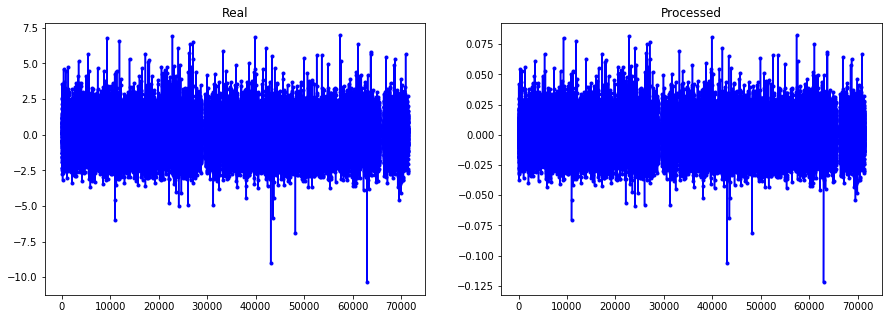

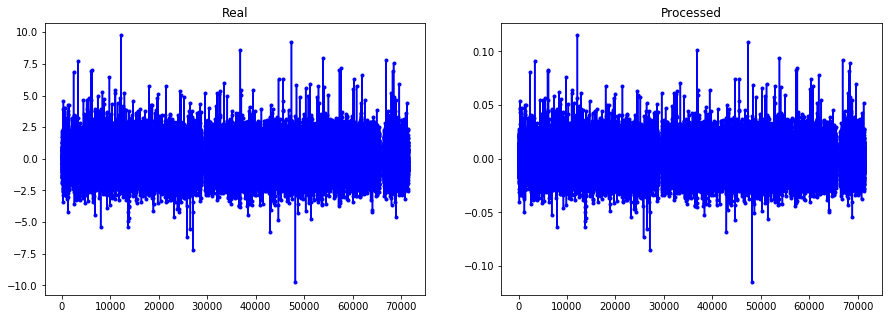

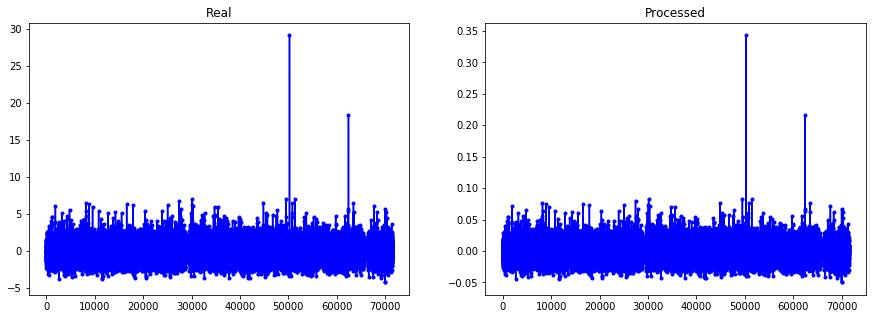

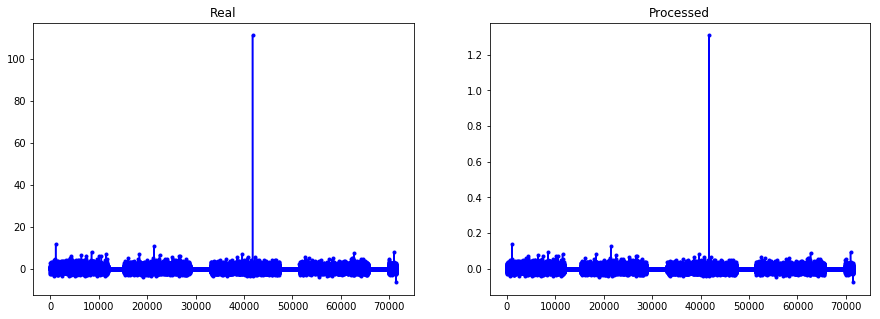

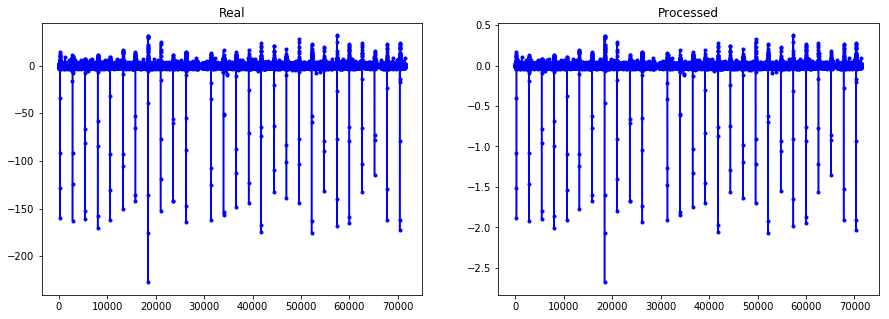

In [24]:
for _ in range(5):
    n_s = np.random.randint(0,X_lc_train.shape[0])
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize= (15,5))
    ax1.plot(X_lc_train[n_s], 'b.-')
    ax1.set_title("Real")
    ax2.plot(X_train[n_s], 'b.-')
    ax2.set_title("Processed")
    plt.show()

In [ ]:
### subsample or oversampling...

In [25]:
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, Dense, Flatten, MaxPool1D, Reshape, UpSampling1D, Lambda
from keras.layers import GlobalAveragePooling1D,GlobalMaxPool1D, TimeDistributed, GRU,LSTM, RepeatVector
from keras.layers import BatchNormalization, Dropout, ZeroPadding1D, ZeroPadding2D, Cropping1D, Cropping2D

#def Conv1DTranspose(input_tensor, filters, kernel_size, strides=2, padding='same',activation='linear'):
#    x = Lambda(lambda x: K.expand_dims(x, axis=2))(input_tensor)
#    x = Conv2DTranspose(filters=filters, kernel_size=(kernel_size, 1), strides=(strides, 1), padding=padding,activation=activation)(x)
#    x = Lambda(lambda x: K.squeeze(x, axis=2))(x)
#    return x

Using TensorFlow backend.


In [26]:
#need data with extra dim
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

### Fully convolutional
---

In [50]:
def encoder_model_CNN1D(input_dim, channels, latent_dim, L=1, filters=8, kernel_s =10, pool=5,
                        BN = False, drop=0, conv_pool=False ): #parametros estructurales
    it = Input(shape=(input_dim,channels))  #fixed length..
    f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(it)
    if BN:
        f1 = BatchNormalization()(f1)
    f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
    if BN:
        f1 = BatchNormalization()(f1)
    if conv_pool:
        f1 = Conv1D(filters, kernel_s, strides=pool, padding='same')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
    else:
        f1 = MaxPool1D(pool_size=pool, strides=pool, padding='same')(f1) 
    if drop != 0:
        f1 = Dropout(drop)(f1)
        
    for _ in range(L-1):
        filters = int(filters*2)
        f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
        f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
        if conv_pool:
            f1 = Conv1D(filters, kernel_s, strides=pool, padding='same')(f1)
            if BN:
                f1 = BatchNormalization()(f1)
        else:
            f1 = MaxPool1D(pool_size=pool, strides=pool, padding='same')(f1) 
        if drop != 0:
            f1 = Dropout(drop)(f1)
    
    redim_shape = K.int_shape(f1)[1:] 
    d1 = GlobalMaxPool1D()(f1) #or global maxpooling
    d1 = Dense(512,activation='relu')(d1)
    out_latent= Dense(latent_dim, activation='linear')(d1)
    return Model(inputs=it, outputs=out_latent), redim_shape

#Conv2d!!!
from keras.layers import Conv2D, Conv2DTranspose, MaxPool2D,UpSampling2D
def decoder_model_CNN2D(input_dim,channels, redim_shape, L=1, filters=8, kernel_s=10, pool=5,
                        BN = False, drop=0, conv_pool=False, T=0 ): #parametros estructurales                        
    it = Input(shape=(input_dim,))
    d1 = Dense(512, activation='relu')(it)
    d1 = Dense(redim_shape[-1], activation='relu')(d1)
    f1 = RepeatVector(redim_shape[0])(d1) #inverso a maxpooling :/
    
    #agregar dim extra para procesar por conv2d
    f1 = Lambda(lambda x: K.expand_dims(x, axis=2))(f1) #along channel axis
    
    filters = int(filters*2**(L-1))
    for _ in range(L):
        if conv_pool:
            f1 = Conv2DTranspose(filters, (kernel_s,1), strides=(pool,1), padding='same')(f1)
            if BN:
                f1 = BatchNormalization()(f1)
        else:
            f1 = UpSampling2D((pool,1))(f1)
        f1 = Conv2D(filters, (kernel_s,1), strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
        f1 = Conv2D(filters, (kernel_s,1), strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
        if drop != 0:
            f1 = Dropout(drop)(f1)
        filters = int(filters/2)
    out_x = Conv2D(channels, (kernel_s,1), strides=1, padding='same', activation='linear')(f1)
    out_x = Lambda(lambda x: K.squeeze(x, axis=-1))(out_x)
    if T != 0:
        T_model = K.int_shape(out_x)[1]
        delta_T = T - T_model
        
        padd_len = int(np.abs(delta_T/2))
        if np.abs(delta_T) % 2 ==0:
            left_pad = right_pad = padd_len                
        else:
            left_pad = padd_len+1
            right_pad = padd_len
        if delta_T > 0:
            out_x = ZeroPadding1D((left_pad, right_pad))(out_x)
        elif delta_T < 0:
            out_x = Cropping1D((left_pad, right_pad))(out_x)

    return Model(inputs=it, outputs=out_x)


""" TO SLOW: DEPRECATED"""
def decoder_model_CNN1D(input_dim, redim_shape, L=1, filters=8, kernel_s=10, pool=5):
    it = Input(shape=(input_dim,))
    d1 = Dense(512, activation='relu')(it)
    d1 = Dense(int(np.prod(redim_shape)), activation='relu')(d1)
    f1 = Reshape(redim_shape)(d1)
    
    filters = int(filters*2**(L-1))
    for _ in range(L):
        f1 = UpSampling1D(pool)(f1)
        f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
        f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
        filters = int(filters/2)
    out_x = Conv1D(1, kernel_s, strides=1, padding='same', activation='linear')(f1)
    return Model(inputs=it, outputs=out_x)


### CNN and then RNN (as text)
---

In [49]:
def encoder_model_CNNRNN(input_dim, channels, latent_dim, L1=1, filters=8,kernel_s =10, pool=5, L2=1, units=32,
                        BN = False, drop=0, conv_pool=False ): #parametros estructurales
    it = Input(shape=(input_dim,channels)) 
    f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(it)
    if BN:
        f1 = BatchNormalization()(f1)
    f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
    if BN:
        f1 = BatchNormalization()(f1)
    if conv_pool:
        f1 = Conv1D(filters, kernel_s, strides=pool, padding='same')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
    else:
        f1 = MaxPool1D(pool_size=pool, strides=pool, padding='same')(f1) 
    if drop != 0:
        f1 = Dropout(drop)(f1)
        
    for _ in range(L1-1):
        filters = int(filters*2)
        f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
        f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
        if conv_pool:
            f1 = Conv1D(filters, kernel_s, strides=pool, padding='same')(f1)
            if BN:
                f1 = BatchNormalization()(f1)
        else:
            f1 = MaxPool1D(pool_size=pool, strides=pool,padding='same')(f1) 
        if drop != 0:
            f1 = Dropout(drop)(f1)

    for _ in range(L2):
        f1 = GRU(units,return_sequences=True)(f1)
        units = int(units*2)
    redim_shape = K.int_shape(f1)[1:] 

    #d1 = GlobalMaxPool1D()(f1) #or global maxpooling
    d1 = GRU(int(units/2),return_sequences=False)(f1)
    
    d1 = Dense(512,activation='relu')(d1)
    out_latent= Dense(latent_dim, activation='linear')(d1)
    return Model(inputs=it, outputs=out_latent), redim_shape

#... falta decoder..

from keras.layers import Conv2D, Conv2DTranspose, MaxPool2D,UpSampling2D
def decoder_model_CNNRNN(input_dim, channels, redim_shape, L1=1, filters=8,kernel_s =10, pool=5, L2=1, units=32,
                        BN = False, drop=0, conv_pool=False, T=0): #parametros estructurales
    it = Input(shape=(input_dim,))
    d1 = Dense(512, activation='relu')(it)
    d1 = Dense(redim_shape[-1], activation='relu')(d1)
    f1 = RepeatVector(redim_shape[0])(d1) #inverso a maxpooling :/
    
    units = int(units*2**(L2-1))
    for _ in range(L2):
        f1 = GRU(units,return_sequences=True)(f1)
        units = int(units/2)
            
    #agregar dim extra para procesar por conv2d
    f1 = Lambda(lambda x: K.expand_dims(x, axis=2))(f1) #along channel axis
    
    filters = int(filters*2**(L2-1))
    for _ in range(L2):
        if conv_pool:
            f1 = Conv2DTranspose(filters, (kernel_s,1), strides=(pool,1), padding='same')(f1)
            if BN:
                f1 = BatchNormalization()(f1)
        else:
            f1 = UpSampling2D((pool,1))(f1)
            
        f1 = Conv2D(filters, (kernel_s,1), strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)    
        f1 = Conv2D(filters, (kernel_s,1), strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
        if drop != 0:
            f1 = Dropout(drop)(f1)
        filters = int(filters/2)
    out_x = Conv2D(channels, (kernel_s,1), strides=1, padding='same', activation='linear')(f1)
    out_x = Lambda(lambda x: K.squeeze(x, axis=-1))(out_x)
    if T != 0:
        T_model = K.int_shape(out_x)[1]
        delta_T = T - T_model
        
        padd_len = int(np.abs(delta_T/2))
        if np.abs(delta_T) % 2 ==0:
            left_pad = right_pad = padd_len                
        else:
            left_pad = padd_len+1
            right_pad = padd_len
        if delta_T > 0:
            out_x = ZeroPadding1D((left_pad, right_pad))(out_x)
        elif delta_T < 0:
            out_x = Cropping1D((left_pad, right_pad))(out_x)
            
    return Model(inputs=it, outputs=out_x)


### RNN jerárquica

def encoder_model(input_dim, latent_dim, L=1, units=8):
    it = Input(shape=(input_dim,1))
    #for level in range(Level:
    
    splits = 10
    T_w = int(input_dim/splits) #y si sobra?...
    f1 = Reshape([splits, T_w, 1])(it)
    
    aux_units = units
    for _ in range(L):
        f1 = TimeDistributed(GRU(aux_units, return_sequences=True))(f1)
        aux_units = int(aux_units*2)
    #terminar..
    f1 = TimeDistributed(GRU(int(units/2), return_sequences=False))(f1)
    
    #ultimo nivel..
    aux_units = units
    for _ in range(L):
        f1 = GRU(aux_units, return_sequences=True)(f1)
        aux_units = int(aux_units*2)

    redim_shape = (splits, int(f1.shape[2]))
    redim_shape = K.int_shape(f1)[1:] 
    #terminar..
    d1 = GRU(int(aux_units/2), return_sequences=False)(f1)
    d1 = Dense(512, activation='relu')(d1)
    out_latent= Dense(latent_dim, activation='linear')(d1)
    return Model(inputs=it, outputs=out_latent), redim_shape

### Dynamic K-pooling
---

In [51]:
from keras.engine import Layer, InputSpec
import tensorflow as tf

class KMaxPooling(Layer):
    """
    K-max pooling layer that extracts the k-highest activations from a sequence (2nd dimension). TensorFlow backend.
    """
    def __init__(self, k=1, **kwargs):
        super().__init__(**kwargs)
        self.input_spec = InputSpec(ndim=3)
        self.k = k

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.k, input_shape[2])

    def call(self, inputs):
        # swap last two dimensions since top_k will be applied along the last dimension
        shifted_input = tf.transpose(inputs, [0, 2, 1])
        # extract top_k, returns two tensors [values, indices]
        top_k = tf.nn.top_k(shifted_input, k=self.k, sorted=True, name=None)[0] 
        return tf.transpose(top_k, [0, 2, 1])
    
class KMinPooling(Layer):
    """
    K-max pooling layer that extracts the k-highest activations from a sequence (2nd dimension). TensorFlow backend.
    """
    def __init__(self, k=1, **kwargs):
        super().__init__(**kwargs)
        self.input_spec = InputSpec(ndim=3)
        self.k = k

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.k, input_shape[2])

    def call(self, inputs):
        # swap last two dimensions since top_k will be applied along the last dimension
        shifted_input = tf.transpose(inputs, [0, 2, 1])        
        # extract top_k, returns two tensors [values, indices]
        top_k = -tf.nn.top_k(-shifted_input, k=self.k, sorted=True, name=None)[0] #min
        return tf.transpose(top_k, [0, 2, 1])
    
import math
def K_l(L,seq_len,k_top,layer=1): #dinamyc k-max
    return max(k_top, math.ceil( seq_len*(L-layer)/L) )

def encoder_model_KPool(input_dim, channels, latent_dim, L=1, filters=8,kernel_s =10, K_top=500,
                        BN = False, drop=0, conv_pool=False ): #parametros estructurales
    #k_top = 500 #podría ser el periodo más corto entre los datos...-- largo final de codificacion conv...
    it = Input(shape=(input_dim, channels))  #None...
    f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(it)
    if BN:
        f1 = BatchNormalization()(f1)
    f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
    if BN:
        f1 = BatchNormalization()(f1)
    f1 = KMinPooling(k = K_l(L, input_dim, K_top, layer=1))(f1)
    if drop != 0:
        f1 = Dropout(drop)(f1)
        
    for l in range(L-1):
        filters = int(filters*2)
        f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
        f1 = Conv1D(filters, kernel_s, strides=1, padding='same', activation='relu')(f1)
        if BN:
            f1 = BatchNormalization()(f1)
        f1 = KMinPooling(k = K_l(L, input_dim, K_top, layer=l+2))(f1) #como se desencodea??
        if drop != 0:
            f1 = Dropout(drop)(f1)
    redim_shape = K.int_shape(f1)[1:] 
    
    f1 = GlobalMaxPool1D()(f1) 
    
    d1 = Dense(512,activation='relu')(f1)
    out_latent= Dense(latent_dim, activation='linear')(d1)
    return Model(inputs=it, outputs=out_latent), redim_shape

    
#SE NECESITA UN DECODER...

### build Encoder

In [30]:
#T could be none
#encoder, redim_shape = encoder_model_CNN2D(T, D_dim, L=3, filters=8, pool=5, kernel_s=10) -- deprecated
encoder, redim_shape = encoder_model_CNN1D(T, 1, D_dim, L=4, filters=8, pool=5, kernel_s=10, BN = True, conv_pool=False) 
#encoder, redim_shape = encoder_model_CNNRNN(T, 1, D_dim, L1=3, filters=8, pool=5, kernel_s=10, L2=3, units=32)
#encoder, redim_shape = encoder_model_KPool(T, 1, D_dim, L=3, filters=8, K_top=100)

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 71427, 1)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 71427, 8)          88        
_________________________________________________________________
batch_normalization_1 (Batch (None, 71427, 8)          32        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 71427, 8)          648       
_________________________________________________________________
batch_normalization_2 (Batch (None, 71427, 8)          32        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14286, 8)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 14286, 16)         1296      
__________

In [77]:
redim_shape #deberia cambiar dependiendo del catalogo..

(115, 64)

### build Decoder

In [52]:
decoder = decoder_model_CNN2D(D_dim, 1, redim_shape, L=4, filters=8, pool=5, kernel_s=10, BN = True, conv_pool=True,T=T)
#decoder = decoder_model_CNNRNN(D_dim,1, redim_shape, L1=3, filters=8,kernel_s =10, pool=5, L2=3, units=32)

#decoder = decoder_model_CNN1D(D_dim, 1,redim_shape, L=3, filters=8, pool=5) --deprecated

decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 115, 64)           0         
_________________________________________________________________
lambda_11 (Lambda)           (None, 115, 1, 64)        0         
_________________________________________________________________
conv2d_transpose_21 (Conv2DT (None, 575, 1, 64)        41024     
_________________________________________________________________
batch_normalization_69 (Batc (None, 575, 1, 64)        256       
__________

### build Autoencoder and supervised

In [53]:
it = Input(shape=X_train.shape[1:])
out = decoder(encoder(it))
autoencoder = Model(it,out)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 71427, 1)          0         
_________________________________________________________________
model_1 (Model)              (None, 32)                132256    
_________________________________________________________________
model_2 (Model)              (None, 71427, 1)          228249    
Total params: 360,505
Trainable params: 359,305
Non-trainable params: 1,200
_________________________________________________________________


In [54]:
#it2 = Input(shape=(encoder.output_shape[-1],))
autoencoder_sup  = Model(inputs=it, outputs=[out,encoder.get_output_at(-1)] ) #supervised autoencoder-- to train

autoencoder_sup.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 71427, 1)          0         
_________________________________________________________________
model_1 (Model)              (None, 32)                132256    
_________________________________________________________________
model_2 (Model)              (None, 71427, 1)          228249    
Total params: 360,505
Trainable params: 359,305
Non-trainable params: 1,200
_________________________________________________________________


In [55]:
def mse_masked(y_true, y_pred):
    """ Masked on 0 value.."""
    mask = K.equal(y_true, 0) #  K.all(, axis=-1)
    mask = 1 - K.cast(mask, K.floatx())

    se_masked = K.square(y_pred-y_true)* mask  #K.multiply(K.square(y_pred-y_true), mask) #square error    
    return K.mean(se_masked, axis=-1)

autoencoder_sup.compile(loss=[mse_masked,'mse'],optimizer='adam', loss_weights=[1,1]) #weights.. 

In [177]:
## define data augmentation..

from keras.utils.data_utils import Sequence

class KOIGenerator(Sequence):
    def __init__(self, x_set, batch_size, flip_p=True, add_n = True, shift=True ):
        self.x = x_set
        self.batch_size = batch_size
        self.flip_p = flip_p
        self.add_n = add_n
        self.shift = shift
        
    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))
    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        return np.stack([self.augment(x) for x in batch_x], axis=0)
            
    def augment(self,x):
        """Do Augmentation"""
        return_x = x.copy()[:,0]
        T = int(return_x.shape[0])
        
        if self.flip_p: #np.random.rand() <= self.flip_p: 
            if np.random.rand() <= 0.5:
                print("Flip")
                return_x = return_x[::-1] #flip
        
        if self.add_n: #np.random.rand() <= self.add_n: 
            if np.random.rand() <= 0.5:
                print("Noise added")
                noise_level =  np.random.uniform(0.01,0.45)
                noise_mask = np.random.binomial(n=1, p=noise_level, size=return_x.shape)
                return_x = return_x[:]*noise_mask
                
        if self.shift:
            if np.random.rand() <= 0.5:
                print("Shift")
                v_shift = np.random.randint(1, int(T*0.49))  #valor a shift?
                return_x = return_x[v_shift:]
                #padd
                return_x = keras.preprocessing.sequence.pad_sequences([return_x], maxlen=T, 
                                    padding='pre', value =0, dtype='float32')[0]
        return return_x[:,None]
                    


# Training data
train_gen = KOIGenerator(X_train, 128)

# Validation data
valid_gen = KOIGenerator(X_test, 128, flip_p = False, add_n = False, shift=False)


# Training
autoencoder.fit_generator(
    train_gen,
    epochs=20,
    validation_data=valid_gen,
    workers=10, use_multiprocessing=True)

RuntimeError: You must compile your model before using it.

In [178]:
def train_model(model,X,y,epochs=1,batch_size=32):
    return model.fit(X,y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

#train_model(autoencoder_sup, X_train, [X_train,Y_meta_train_std] , batch_size=128) 

### Experiment architecture..

In [83]:
print("Arquitectura: 4 capas, parten 8 filtros, kernel 10, pool 5")

Arquitectura: 4 capas, parten 8 filtros, kernel 10, pool 5


In [85]:
print("Arquitectura: full CNN sin BN sin conv/stride")

encoder, redim_shape = encoder_model_CNN1D(T, 1, D_dim, L=4, filters=8, pool=5, kernel_s=10,BN=False) 
decoder = decoder_model_CNN2D(D_dim, 1, redim_shape, L=4, filters=8, pool=5, kernel_s=10, BN = False,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) 

Arquitectura: full CNN sin BN sin conv/stride
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 71427, 1)          0         
_________________________________________________________________
model_20 (Model)             (None, 32)                131296    
_________________________________________________________________
model_21 (Model)             (None, 71427, 1)          172289    
Total params: 303,585
Trainable params: 303,585
Non-trainable params: 0
_________________________________________________________________
Train on 3753 samples, validate on 939 samples
Epoch 1/15
3753/3753 [==============================] - 405s 108ms/step - loss: 0.0638 - val_loss: 0.0235
Epoch 2/15
3753/3753 [==============================] - 405s 108ms/step - loss: 0.0638 - val_loss: 0.0235
Epoch 3/15
3753/3753 [==============================] - 401s 107ms/step - loss: 0.0637 - val_lo

In [89]:
print("Arquitectura: full CNN con BN sin conv/stride")
encoder, redim_shape = encoder_model_CNN1D(T, 1, D_dim, L=4, filters=8, pool=5, kernel_s=10,BN=True) 
decoder = decoder_model_CNN2D(D_dim, 1, redim_shape, L=4, filters=8, pool=5, kernel_s=10, BN = True,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) 

Arquitectura: full CNN con BN sin conv/stride
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 71427, 1)          0         
_________________________________________________________________
model_26 (Model)             (None, 32)                132256    
_________________________________________________________________
model_27 (Model)             (None, 71427, 1)          173249    
Total params: 305,505
Trainable params: 304,545
Non-trainable params: 960
_________________________________________________________________
Train on 3753 samples, validate on 939 samples
Epoch 1/15
3753/3753 [==============================] - 638s 170ms/step - loss: 0.1938 - val_loss: 0.0353
Epoch 2/15
3753/3753 [==============================] - 630s 168ms/step - loss: 0.0665 - val_loss: 0.0359
Epoch 3/15
3753/3753 [==============================] - 628s 167ms/step - loss: 0.0655 - val_

In [91]:
print("Arquitectura: full CNN sin BN con conv/stride")
encoder, redim_shape = encoder_model_CNN1D(T, 1, D_dim, L=4, filters=8, pool=5, kernel_s=10,BN=False, conv_pool=True) 
decoder = decoder_model_CNN2D(D_dim, 1, redim_shape, L=4, filters=8, pool=5, kernel_s=10, BN = False, conv_pool=True,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) 

Arquitectura: full CNN sin BN con conv/stride
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 71427, 1)          0         
_________________________________________________________________
model_32 (Model)             (None, 32)                185816    
_________________________________________________________________
model_33 (Model)             (None, 71427, 1)          226809    
Total params: 412,625
Trainable params: 412,625
Non-trainable params: 0
_________________________________________________________________
Train on 3753 samples, validate on 939 samples
Epoch 1/15
3753/3753 [==============================] - 336s 89ms/step - loss: 0.0638 - val_loss: 0.0235
Epoch 2/15
3753/3753 [==============================] - 330s 88ms/step - loss: 0.0638 - val_loss: 0.0235
Epoch 3/15
3753/3753 [==============================] - 330s 88ms/step - loss: 0.0638 - val_loss:

In [93]:
print("Arquitectura: full CNN con BN con conv/stride")
encoder, redim_shape = encoder_model_CNN1D(T, 1, D_dim, L=4, filters=8, pool=5, kernel_s=10,BN=True, conv_pool=True) 
decoder = decoder_model_CNN2D(D_dim, 1, redim_shape, L=4, filters=8, pool=5, kernel_s=10, BN=True, conv_pool=True,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) #al parecerf es la mejor..

Arquitectura: full CNN con BN con conv/stride
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 71427, 1)          0         
_________________________________________________________________
model_38 (Model)             (None, 32)                187256    
_________________________________________________________________
model_39 (Model)             (None, 71427, 1)          228249    
Total params: 415,505
Trainable params: 414,065
Non-trainable params: 1,440
_________________________________________________________________
Train on 3753 samples, validate on 939 samples
Epoch 1/15
3753/3753 [==============================] - 663s 177ms/step - loss: 0.3425 - val_loss: 0.7579
Epoch 2/15
3753/3753 [==============================] - 652s 174ms/step - loss: 0.0769 - val_loss: 0.0840
Epoch 3/15
3753/3753 [==============================] - 651s 174ms/step - loss: 0.0678 - va

KeyboardInterrupt: 

In [ ]:
#las mismas 4 conf con cnn rnn

In [ ]:
print("Arquitectura: 4 capas, parten 8 filtros, kernel 10, pool 5 --> 2 capas, parten 32 unidades")

In [ ]:
print("Arquitectura: CNN->RNN sin BN sin conv/stride")
encoder, redim_shape = encoder_model_CNNRNN(T, 1, D_dim, L1=4, filters=8, pool=5, kernel_s=10, L2=2, units=32,
                                           BN = False, conv_pool=False)
decoder = decoder_model_CNNRNN(D_dim,1, redim_shape, L1=4, filters=8,kernel_s =10, pool=5, L2=2, units=32,
                                                                          BN = False, conv_pool=False,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) 

In [ ]:
print("Arquitectura: CNN->RNN con BN sin conv/stride")
encoder, redim_shape = encoder_model_CNNRNN(T, 1, D_dim, L1=4, filters=8, pool=5, kernel_s=10, L2=2, units=32,
                                           BN = True, conv_pool=False)
decoder = decoder_model_CNNRNN(D_dim,1, redim_shape, L1=4, filters=8,kernel_s =10, pool=5, L2=2, units=32,
                                                                          BN = True, conv_pool=False,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) 

In [ ]:
print("Arquitectura: CNN->RNN sin BN con conv/stride")
encoder, redim_shape = encoder_model_CNNRNN(T, 1, D_dim, L1=4, filters=8, pool=5, kernel_s=10, L2=2, units=32,
                                           BN = False, conv_pool=True)
decoder = decoder_model_CNNRNN(D_dim,1, redim_shape, L1=4, filters=8,kernel_s =10, pool=5, L2=2, units=32,
                                                                          BN = False, conv_pool=True,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) 

In [ ]:
print("Arquitectura: CNN->RNN con BN con conv/stride")
encoder, redim_shape = encoder_model_CNNRNN(T, 1, D_dim, L1=4, filters=8, pool=5, kernel_s=10, L2=2, units=32,
                                           BN = True, conv_pool=True)
decoder = decoder_model_CNNRNN(D_dim,1, redim_shape, L1=4, filters=8,kernel_s =10, pool=5, L2=2, units=32,
                                                                          BN = True, conv_pool=True,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) 

In [179]:
print("Arquitectura: Shallue con capa densa")
encoder, redim_shape = encoder_model_CNN1D(T, 1, D_dim, L=5, filters=16, pool=2,kernel_s=5,BN=False, conv_pool=False) 
decoder = decoder_model_CNN2D(D_dim, 1, redim_shape, L=5, filters=16, pool=2, kernel_s=5, BN=False, conv_pool=False,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) 

Arquitectura: Shallue con capa densa
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 71427, 1)          0         
_________________________________________________________________
model_5 (Model)              (None, 32)                803152    
_________________________________________________________________
model_6 (Model)              (None, 71427, 1)          1131057   
Total params: 1,934,209
Trainable params: 1,934,209
Non-trainable params: 0
_________________________________________________________________
Train on 3753 samples, validate on 939 samples
Epoch 1/15
3753/3753 [==============================] - 1814s 483ms/step - loss: 0.0639 - val_loss: 0.0236
Epoch 2/15
3753/3753 [==============================] - 1848s 493ms/step - loss: 0.0638 - val_loss: 0.0236
Epoch 3/15
3753/3753 [==============================] - 1811s 483ms/step - loss: 0.0638 - val_loss

KeyboardInterrupt: 

In [ ]:
print("Arquitectura: Shallue con capa densa version KOI")
encoder, redim_shape = encoder_model_CNN1D(T, 1, D_dim, L=5, filters=16, pool=4,kernel_s=10,BN=False, conv_pool=False) 
decoder = decoder_model_CNN2D(D_dim, 1, redim_shape, L=5, filters=16, pool=4, kernel_s=10, BN=False, conv_pool=False,T=T)
it = Input(shape=X_train.shape[1:])
autoencoder = Model(it, decoder(encoder(it)))
autoencoder.summary()

autoencoder.compile(loss=mse_masked, optimizer='adam') 
train_model(autoencoder, X_train, X_train , batch_size=128, epochs=15) 

### Sobre la mejor encontrada:
* Acotar experimentaciones
* AverageMaxPooling envez de GlobalMaxPooling
* Variar pool -- > version vgg (3x3 pool 2 con hartas capas..)
* Comparar con K-pool (max o min?)
* sin capa densa

### Verificar...

In [180]:
#plot some predictions..

def plot_n_lc(real_lc, decoded_lc, n = 10):
    for _ in range(n):
        n_sampled = np.random.randint(0, real_lc.shape[0])
        
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize= (15,5))
        ax1.plot(real_lc[n_sampled], 'bo-')
        ax1.set_title("Real")
        ax2.plot(decoded_lc[n_sampled], 'bo-')
        ax2.set_title("Reconstructed")
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(real_lc[n_sampled], 'bo-', label="Real")
        plt.plot(decoded_lc[n_sampled], 'g*-', label="Reconstructed")
        plt.title("Over")
        plt.legend()
        plt.show()
        print("----------------------------------------------------------------")

        

def plot_n_meta(metadata, encoded, n= 10):
    for _ in range(n):
        n_sampled = np.random.randint(0,metadata.shape[0])

        print("Metadata:  ",columns_to_get)
        print("Real:      ",metadata[n_sampled])
        print("Predicted: ",encoded[n_sampled])
        print("----------------------------------------------------------------")

#how to evaluate??
from sklearn.metrics import mean_absolute_error,mean_squared_error

def mse_real(X, Xhat):
    res_metadata = {}
    #inverse trnasformation??
    res_metadata["MSE real"] = 0
    res_metadata["MAE real"] = 0
    
    res_metadata["MSE"] = mean_squared_error(X, Xhat)
    res_metadata["MAE"] = mean_absolute_error(X, Xhat)
    return res_metadata

In [181]:
#X_train_hat = np.squeeze(autoencoder.predict(X_train))

X_train_encoder = encoder.predict(X_train)
X_train_hat = np.squeeze(decoder.predict(X_train_encoder))
X_train_hat.shape

(4692, 71427)

In [182]:
X_train_encoder.shape

(4692, 32)

In [51]:
mse_real(X_train_encoder, Y_meta_train_std)

{'MAE': 0.5684666293748313,
 'MAE real': 0,
 'MSE': 1.0030615144046309,
 'MSE real': 0}

In [53]:
print("Standarize")
plot_n_meta(Y_meta_train_std, X_train_encoder, n= 10)
print("Original version")
plot_n_meta(Y_meta_train, std.inverse_transform(X_train_encoder), n= 10)

Metadata:   ['Period', 'Duration', 'Teff']
Real:       [5.6818769e-01 2.0000000e+00 5.7610000e+03]
Predicted:  [  33.502132     6.1696053 5790.896    ]
----------------------------------------------------------------
Metadata:   ['Period', 'Duration', 'Teff']
Real:       [  92.7495777    5.506     4141.       ]
Predicted:  [  33.543613     6.1819887 5791.584    ]
----------------------------------------------------------------
Metadata:   ['Period', 'Duration', 'Teff']
Real:       [2.17355253e+00 1.61070000e+00 5.00800000e+03]
Predicted:  [  33.52203      6.1719856 5790.968    ]
----------------------------------------------------------------
Metadata:   ['Period', 'Duration', 'Teff']
Real:       [9.33157032e-01 2.61400000e+00 6.49900000e+03]
Predicted:  [  33.45831     6.173579 5789.8535  ]
----------------------------------------------------------------
Metadata:   ['Period', 'Duration', 'Teff']
Real:       [1.71326312e+01 3.05550000e+00 5.47700000e+03]
Predicted:  [  33.58159      6

Processed


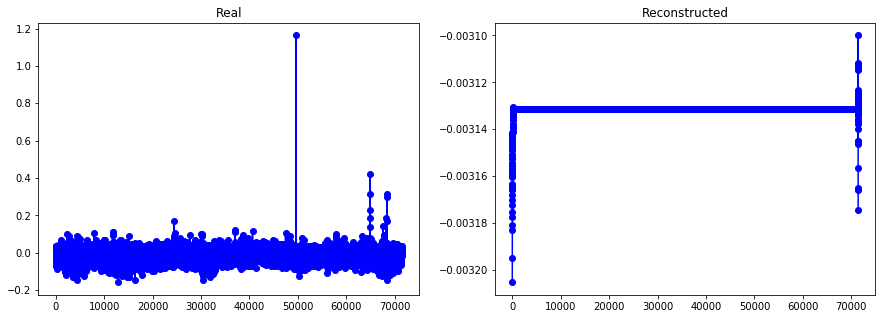

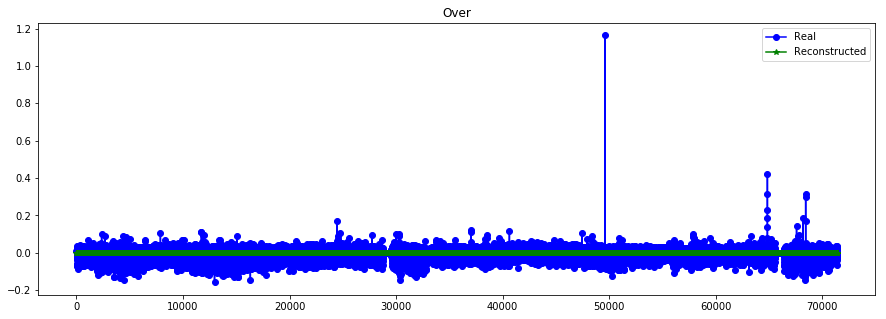

----------------------------------------------------------------


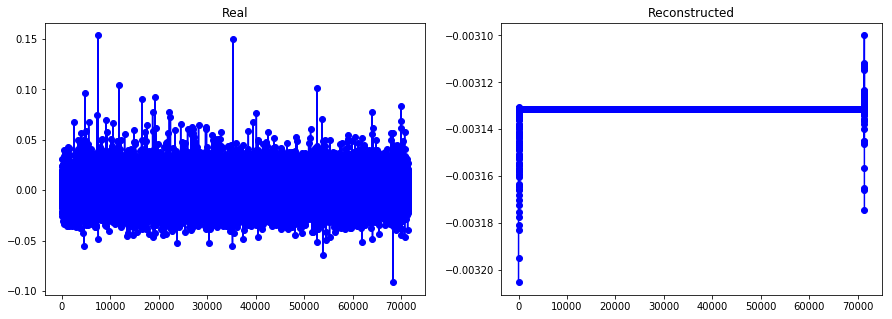

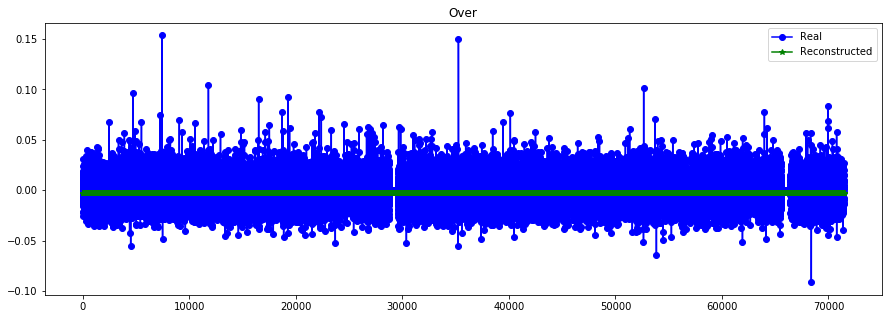

----------------------------------------------------------------


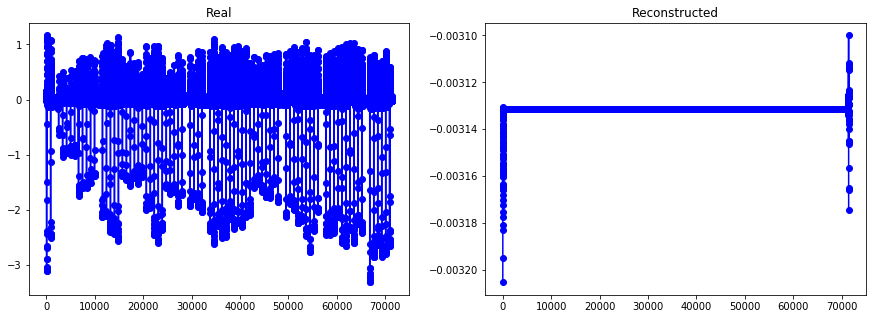

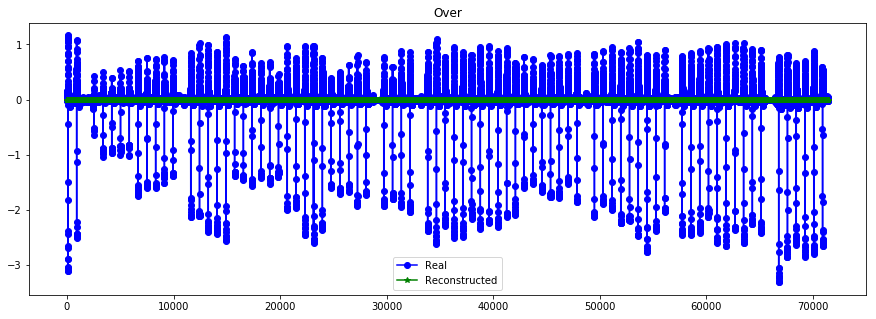

----------------------------------------------------------------


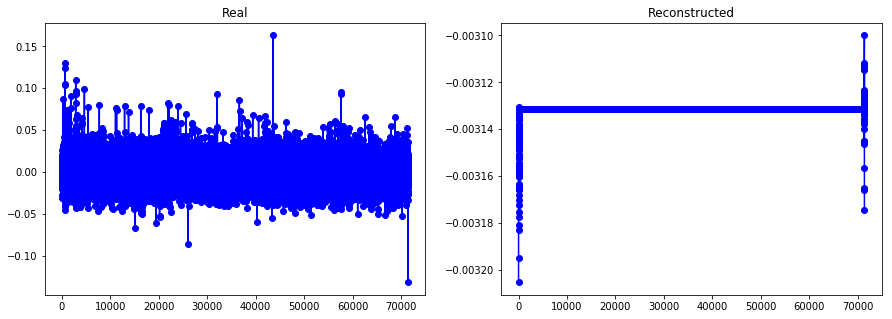

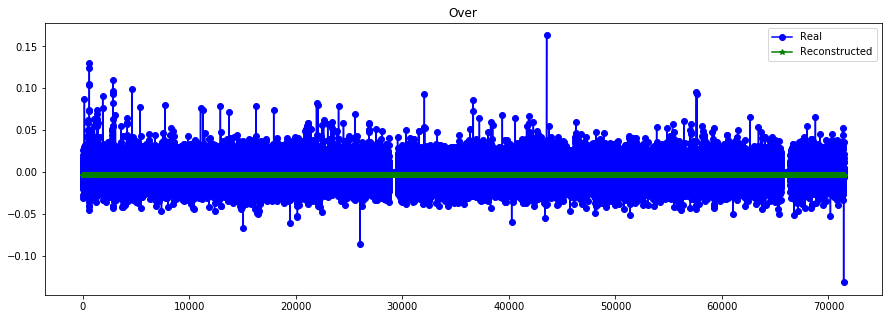

----------------------------------------------------------------


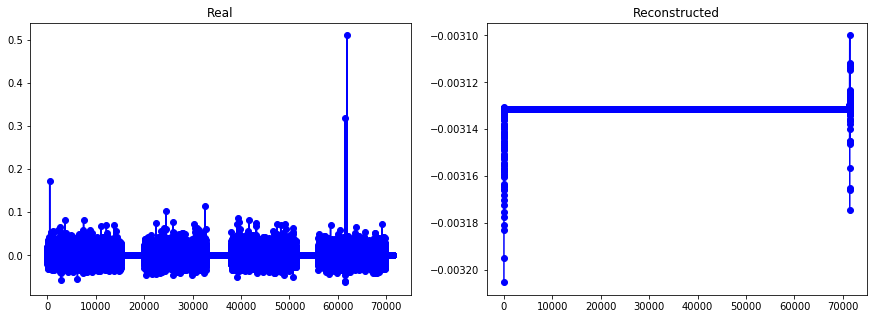

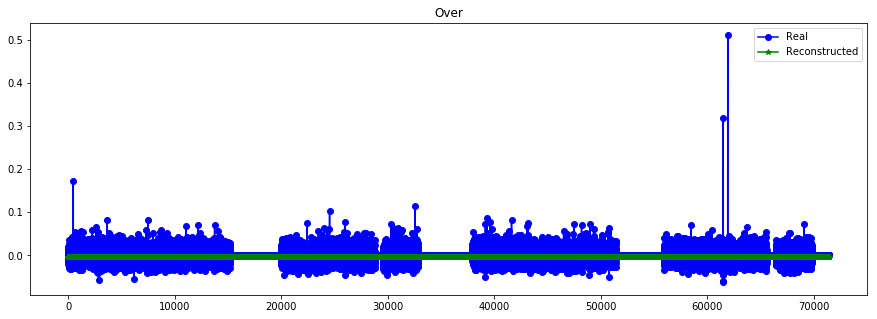

----------------------------------------------------------------
Original version


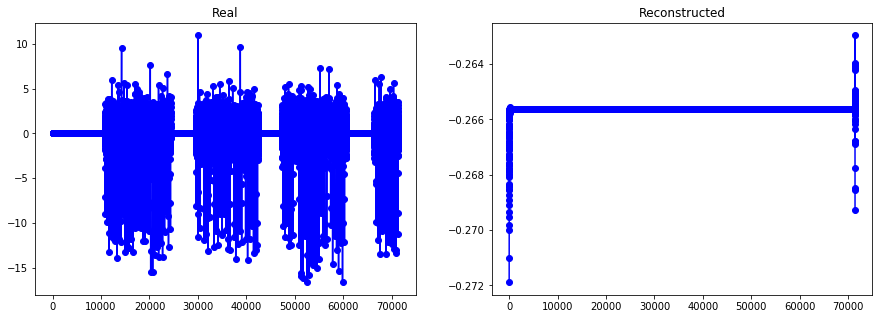

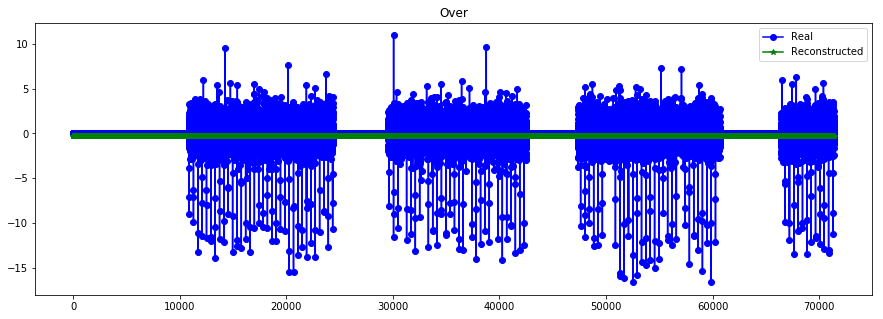

----------------------------------------------------------------


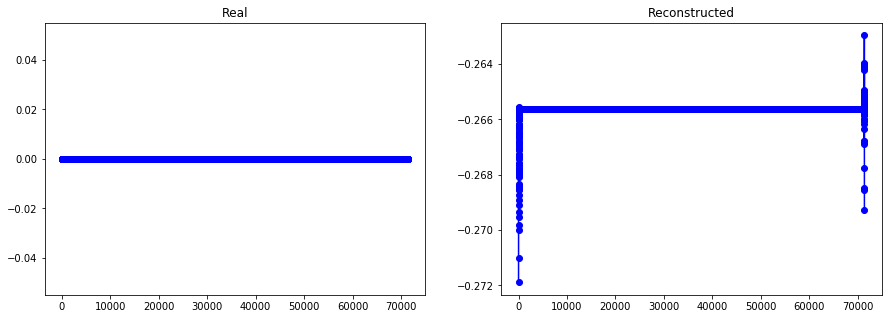

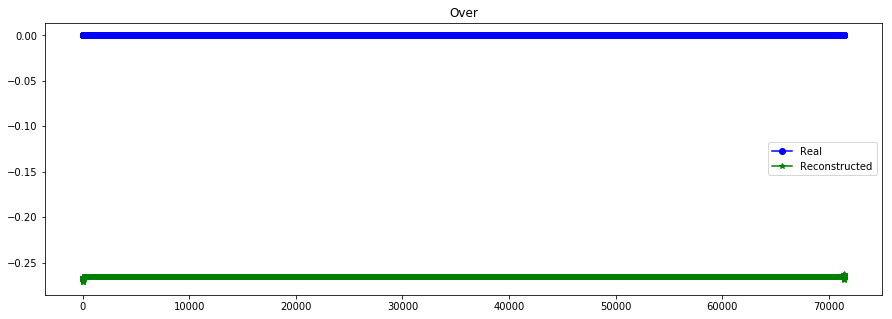

----------------------------------------------------------------


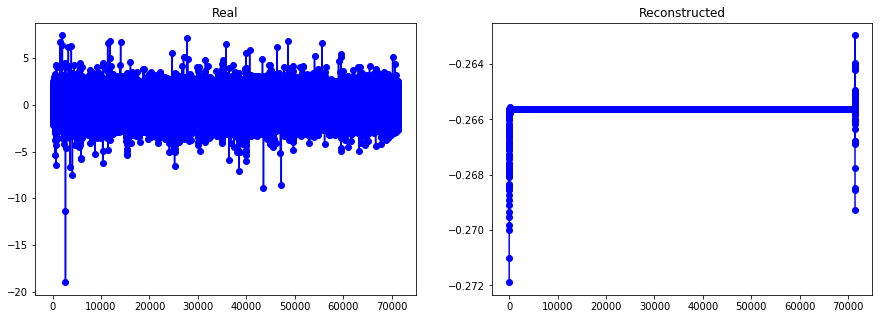

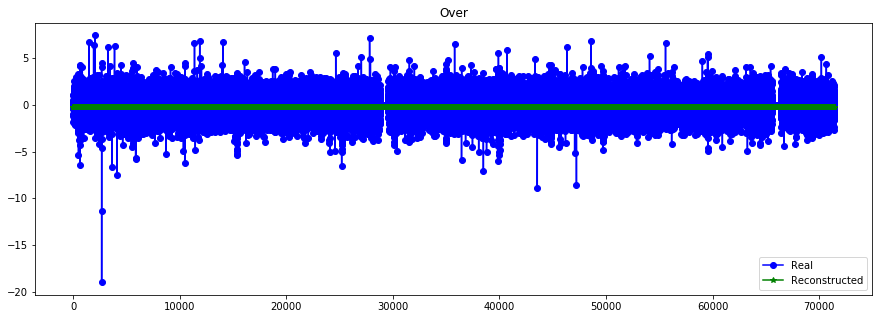

----------------------------------------------------------------


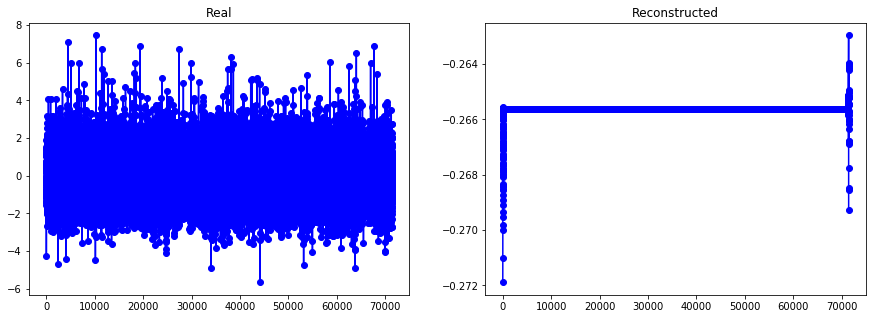

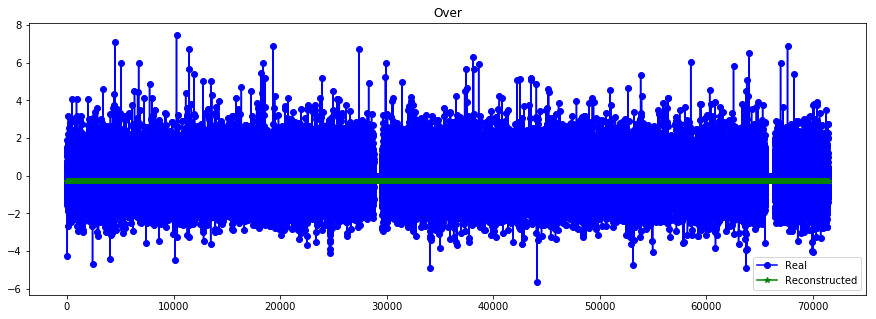

----------------------------------------------------------------


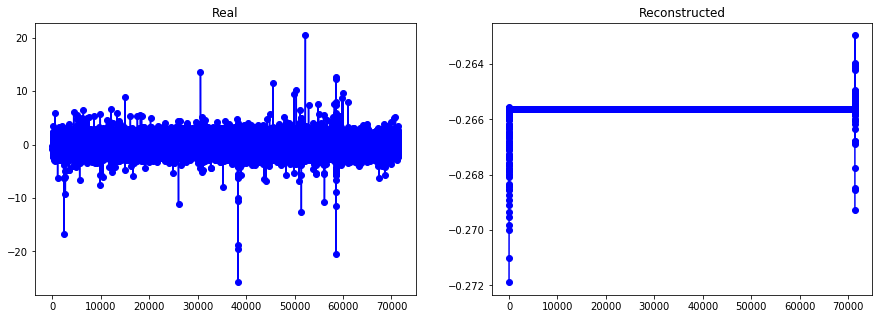

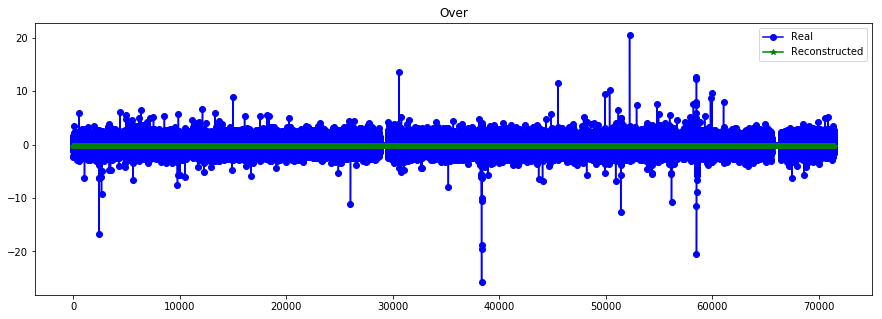

----------------------------------------------------------------


In [183]:
print("Processed")
plot_n_lc(X_train, X_train_hat, n= 5)
print("Original version")
plot_n_lc(X_lc_train, ownpro.inverse_transform(X_train_hat), n= 5)

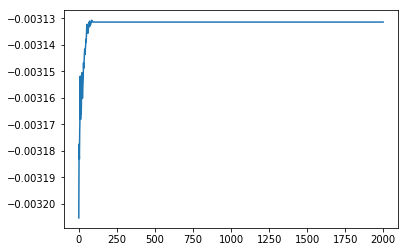

In [184]:
plt.plot(X_train_hat[0][:2000])

In [52]:
#verificar al acc que llega random forest con esta representacion (eso era??)

In [185]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score, accuracy_score, precision_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score_we':make_scorer(f1_score,average='weighted'),
    'f1_score_macro':make_scorer(f1_score,average='macro'),
    'f1_score_micro':make_scorer(f1_score,average='micro')
}

import os, sys
dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)

from evaluation import calculate_metrics
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1, random_state=0)
param_grid = {
    'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
    'min_samples_split': [2,5,10,15,20,25],
    #'max_depth': np.arange(5,25),
    'class_weight' : ['balanced','balanced_subsample',None]
}

skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search.fit(X_train_encoder, y_train)

print('Best params for completeness:', grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)
bestResults = results[results.params == grid_search.best_params_]
completeness = float(bestResults['mean_test_recall_score'])
print('Completion: {:.4f}'.format(completeness))
preci = float(bestResults['mean_test_precision_score'])
print('Contamination: {:.4f}'.format(1-preci))
f1_w = float(bestResults['mean_test_f1_score_we'])
print('F1-score weighted: {:.4f}'.format(f1_w))
f1_ma = float(bestResults['mean_test_f1_score_macro'])
print('F1-score macro: {:.4f}'.format(f1_ma))
f1_mi = float(bestResults['mean_test_f1_score_micro'])
print('F1-score micro: {:.4f}'.format(f1_mi))

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_f

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best params for completeness: {'min_samples_split': 2, 'n_estimators': 10, 'class_weight': None}
Completion: 0.0051
Contamination: 0.4933
F1-score weighted: 0.4795
F1-score macro: 0.3878
F1-score micro: 0.6208


In [186]:
X_test_encoder = encoder.predict(X_test)

model = RandomForestClassifier(n_jobs=-1, random_state=0, **grid_search.best_params_) 
model.fit(X_train_encoder,y_train) 

ypred_train = model.predict(X_train_encoder)
ypred_test = model.predict(X_test_encoder)

In [187]:
print("Train")
aux = calculate_metrics(y_train, ypred_train)
print("Test")
aux = calculate_metrics(y_test, ypred_test) #focal loss?

Train
                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive   0.40606   0.40606  0.770247     0.494545       0.626478   
Confirmed        0.40606   0.40606  0.041873     0.494545       0.974359   

                Recall raw  
False Positive    0.999657  
Confirmed         0.021396  
Test
                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.403582  0.403582  0.807165     0.546706        0.67711   
Confirmed       0.403582  0.403582  0.000000     0.546706        0.00000   

                Recall raw  
False Positive    0.999057  
Confirmed         0.000000  
